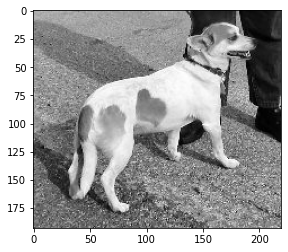

In [5]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2

DATADIR = "/home/arsen/Pictures/pets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

In [6]:
print(img_array.shape)

(193, 220)


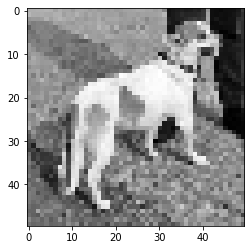

In [12]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [14]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


In [37]:
print(len(training_data))

24946


In [38]:
import random

random.shuffle(training_data)

In [39]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
0
0
1
0
1


In [40]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [41]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [44]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [45]:
X[1]

array([[[ 65],
        [ 67],
        [ 74],
        ...,
        [ 42],
        [ 38],
        [ 37]],

       [[ 57],
        [ 66],
        [ 69],
        ...,
        [ 22],
        [ 21],
        [ 20]],

       [[ 21],
        [ 22],
        [ 37],
        ...,
        [ 23],
        [ 21],
        [ 21]],

       ...,

       [[108],
        [112],
        [115],
        ...,
        [168],
        [164],
        [161]],

       [[ 98],
        [108],
        [111],
        ...,
        [167],
        [165],
        [154]],

       [[ 87],
        [106],
        [109],
        ...,
        [161],
        [162],
        [157]]], dtype=uint8)